In [67]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm', 'diff']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [68]:
from scipy.stats import norm,t
from ipywidgets import interact, IntSlider, FloatSlider

# D1

In [69]:
def experiment1(n_experiment):
    total=0
    for i in range(n_experiment):
        octa=np.random.randint(1,9)
        dodec=np.random.randint(1,13)
        icosa=np.random.randint(1,21)
        if octa + dodec == icosa:
            total += 1.0
    return total/n_experiment

In [70]:
def D1(N,n):
    D=[]
    for i in range(N):
        D.append(experiment1(n))
    return D

Data Set- D_1

In [71]:
D_1=D1(1000,100)

True Mean

In [72]:
U_D1=mean(D_1)
print('True Mean = ',U_D1)

True Mean =  0.048040000000000006


Standard Deviation

In [73]:
S_D1=std(D_1,ddof=1)
print('True Standard Deviation = ',S_D1)

True Standard Deviation =  0.020909222740111495


Boxplot

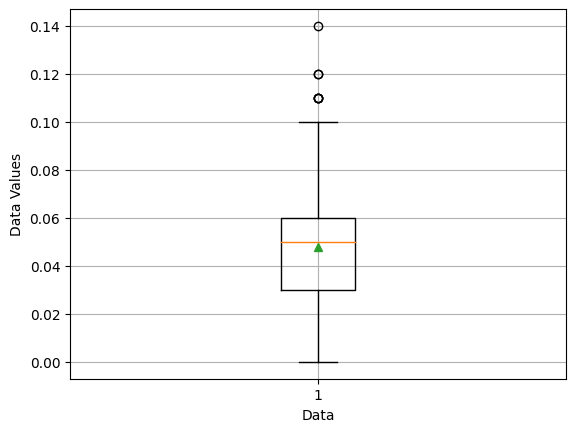

In [74]:
boxplot(D_1,showmeans=True);
xlabel('Data')
ylabel('Data Values')
grid()

Sampling Distribution:

In [75]:
def S_1(H,M):
    global Mean1,Sd1,M1,St1
    Mean1=[]
    Sd1=[]
    for x in range(M):
        S=[]
        for i in range(H):
            m=randint(1000)
            S.append(D_1[m])
        Mean1.append(mean(S))
        Sd1.append(std(S,ddof=1))
    M1=mean(Mean1)
    St1=std(Sd1,ddof=1)
    return Mean1,Sd1

In [76]:
def S1(H,M):
    xlim(0.02,0.09)
    hist(S_1(H,M)[0],bins=50,density=True,color='red');
    xlabel('Probability Values')
    ylabel('f')

Text(0.5, 1.0, 'N=40')

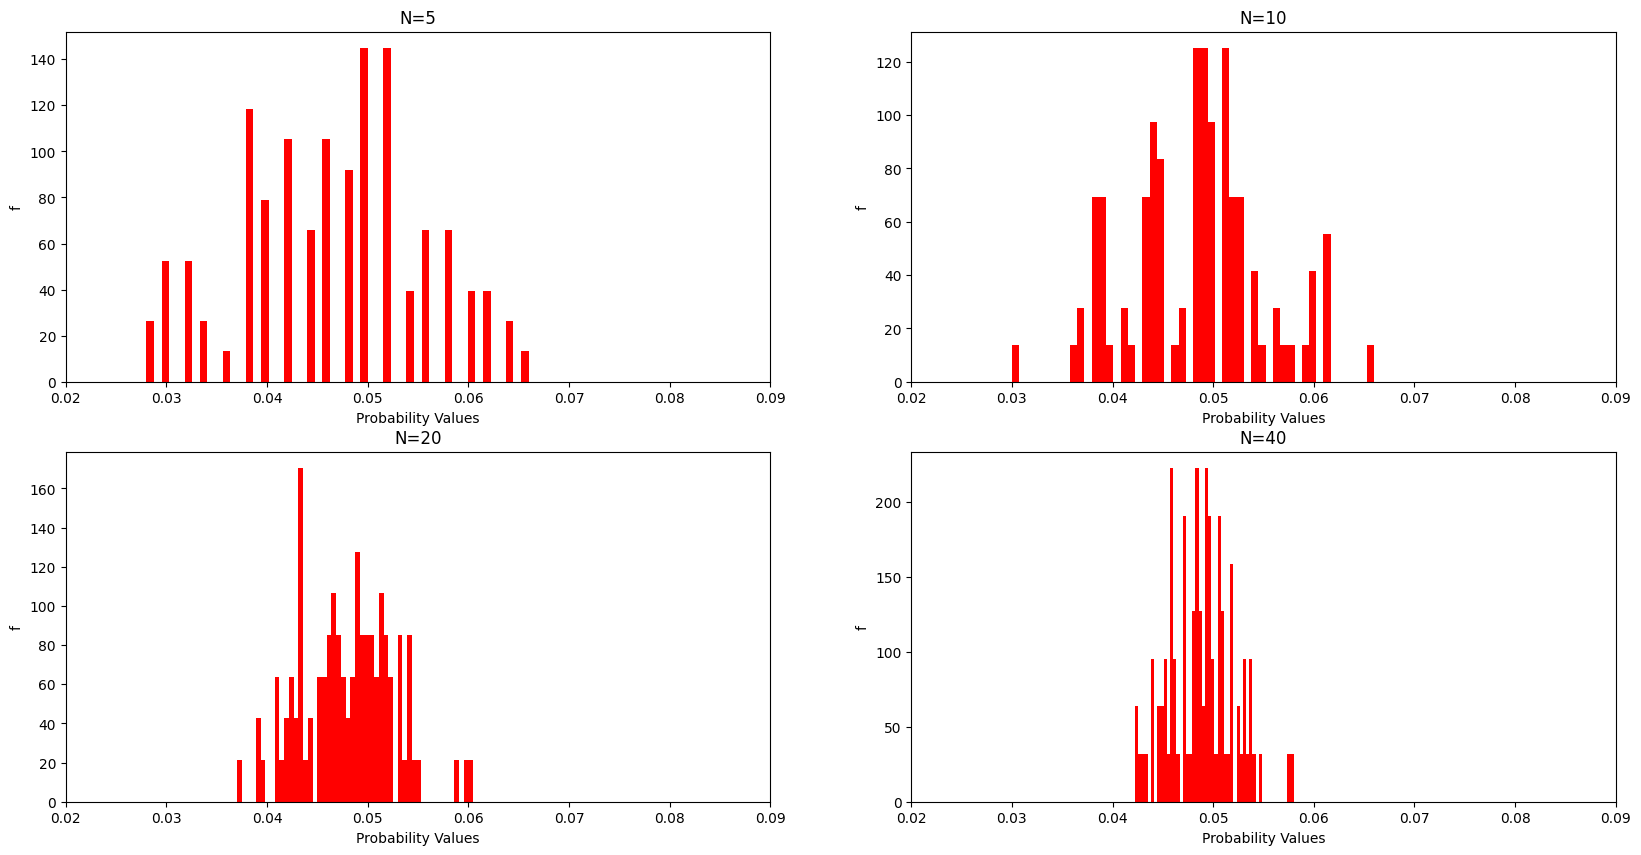

In [77]:
figure(figsize=(20,10))

subplot(2,2,1)
S1(5,100)
title('N=5')

subplot(2,2,2)
title('N=10')
S1(10,100)

subplot(2,2,3)
S1(20,100)
title('N=20')

subplot(2,2,4)
S1(40,100)
title('N=40')

In [78]:
def conmpare_t_norm1(H,M):
    x=linspace(-5,5)
    hist((H**0.5)*(Mean1-U_D1)/(S_D1),bins=50,density=True,color='red');
    plot(x, norm.pdf(x, loc=0, scale=1),'y--',label='Normal Distribution')
    plot(x, t.pdf(x,H-1),'.-.',label='t-distribution')
    legend(loc='best')
    xlabel('x')
    ylabel('Density')

interactive(children=(IntSlider(value=102, description='H', max=200, min=5), IntSlider(value=550, description=…

<function __main__.conmpare_t_norm1(H, M)>

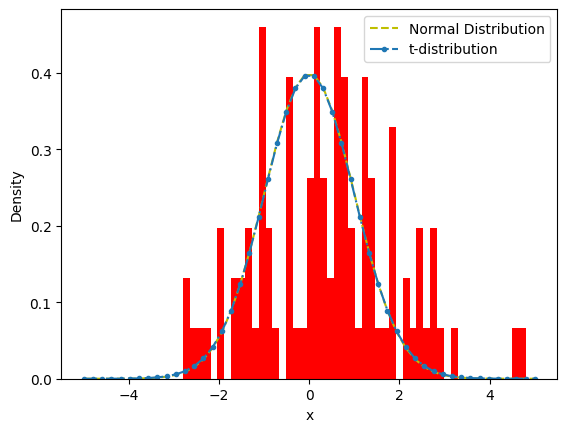

In [79]:
interact(conmpare_t_norm1,H=(5,200),M=(100,1000))

Confidence Intervals

In [80]:
def ConfInt1(percent,H):
    alpha1 = 1.0 - percent
    ppf1 = 1.0 - (0.5*alpha1)
    ct1= (t.ppf(ppf1, H-1))*(St1/(sqrt(H)))
    print("{}% confidence interval of the mean ( T- distribution): {:.4f} +- {:.8f}".format(percent*100, M1, ct1))

def Conf_Int1(percent,H):
    alpha1 = 1.0 - percent
    ppf1 = 1.0 - (0.5*alpha1)
    cn1= (norm.ppf(ppf1))*(St1/(sqrt(H)))
    print("{}% confidence interval of the mean ( Normal- distribution): {:.4f} +- {:.8f}".format(percent*100, M1, cn1),'\n')


In [81]:
def Conf_print(H):
    print('N=',H)
    ConfInt1(0.8,H)
    Conf_Int1(0.8,H)
    ConfInt1(0.95,H)
    Conf_Int1(0.95,H)
    ConfInt1(0.99,H)
    Conf_Int1(0.99,H)

In [82]:
interact(Conf_print,H=(5,100,5));

interactive(children=(IntSlider(value=50, description='H', min=5, step=5), Output()), _dom_classes=('widget-in…

For a fixed N, the confidence interval with a lower percentage is located inside the one with a higher percentage. As N increases, the width of the confidence interval of the t- distribution decreases. Also, for a large N, the confidence intervals of t- distribution and normal- distribution get closer.

In [83]:
def diff(percent,H):
    alpha1 = 1.0 - percent
    ppf1 = 1.0 - (0.5*alpha1)
    cn1= (norm.ppf(ppf1))*(St1/(sqrt(H)))
    ct1= (t.ppf(ppf1, H-1))*(St1/(sqrt(H)))
    k=ct1 - cn1
    return k

In [84]:
def decrease_interval_diff(percent):
    x=[5,10,20,30,40]
    K= [diff(percent,5),diff(percent,10),diff(percent,20),diff(percent,30),diff(percent,40)]
    plot(x,K,'go')
    ylim(0,0.0025)
    xlabel('Sample Size')
    ylabel('Difference in Confidence Interval')

interactive(children=(FloatSlider(value=0.89, description='percent', max=0.99, min=0.8, step=0.01), Output()),…

<function __main__.decrease_interval_diff(percent)>

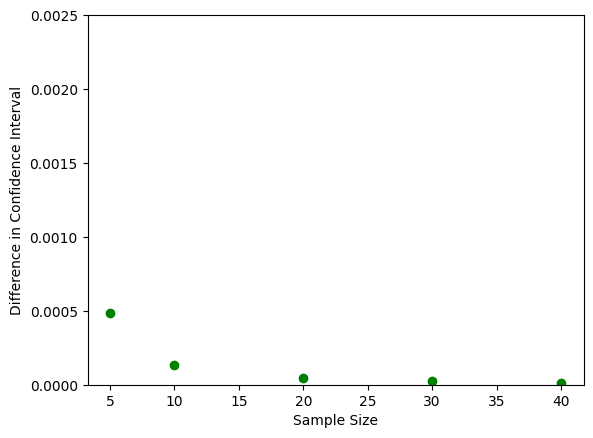

In [85]:
interact(decrease_interval_diff,percent=(0.80,0.99,0.01))


CONFIDENCE INTERVAL AND BOXPLOT:

In [86]:
# The confidence intervals exceed the interquantile region of the boxplot for higher percentages.

COMPUTATIONALLY DETERMING THE VALIDITY OF CONFIDENCE INTERVALS-

In [87]:
def confinter_1(H,percent,M):
    d1t,d1n = 0,0
    alpha1 = 1.0 - percent
    ppf1 = 1.0 - (0.5*alpha1)
    for m in range(M):
        k=random.randint(len(Mean1))
        kj= Sd1[k]
        ki= Mean1[k]
        c1t= (t.ppf(ppf1, H-1))*(kj/(sqrt(H)))
        c1n= (norm.ppf(ppf1))*(kj/(sqrt(H)))
        if ki-c1t <= U_D1 <= ki + c1t:
                d1t += 1
        if ki-c1n <= U_D1 <= ki + c1n:
                d1n += 1
    d1t /= M
    d1n /= M
    print("Fraction of experiments where true mean lies in confidence interval (t-distribution) = {}".format(d1t))
    print("Fraction of experiments where true mean lies in confidence interval (Normal-Distribution) = {}".format(d1n))

In [88]:
interact(confinter_1,H=(5,40,5),percent=(0.8,0.99,0.01), M=(50,500,50));

interactive(children=(IntSlider(value=20, description='H', max=40, min=5, step=5), FloatSlider(value=0.89, des…

The t-distribution is more accurate for calculating the confidence interval as compared to the normal distribution.

# D2

Data Set D2

In [89]:
D2=[580,845,1317,2015,2800,4581,6058,7813,9823,11950,14553,17391,20630,24545,28266,31439,34876,37552,40553,43099,45134,59287,64438,67100,69197,71329,73332,75184,75700,76677,77673,78651,79205,80087,80828,81820,83108,84615,86605,88585,90447,93018,95324,98418,102059,106117,110013,114448,119019,124335,134594,145527,156512,169543,182470,198246,218983,245162,275874,305366,337843,379469,423363,472100,533205,598060,664940,725584,790012,864229,941687,1022140,1106573,1188365,1259285,1332572,1411180,1496019,1581505,1673711,1753367,1825079,1895521,1968891,2051944,2132952,2218208,2298862,2374486,2448176,2523812,2604070,2689021,2791121,2881533,2955078,3024621,3100170,3180137,3266132,3361305,3444192,3526536,3606039,3687506,3783479,3879928,3976563,4065924,4145975,4220794,4306378,4395823,4492780,4593072,4689879,4772122,4862217,4957412,5060164,5167106,5275936,5375871,5472605,5562645,5655465,762281,5879114,6005239,6129572,6238550]

In [90]:
len(D2)

131

True Mean

In [91]:
U_D2= mean(D2)
print('Mean = ',U_D2)

Mean =  1641696.2671755725


Standard Deviation

In [92]:
S_D2=std(D2,ddof=1)
print('Standard deviation=',S_D2)

Standard deviation= 1918736.6886133451


Boxplot

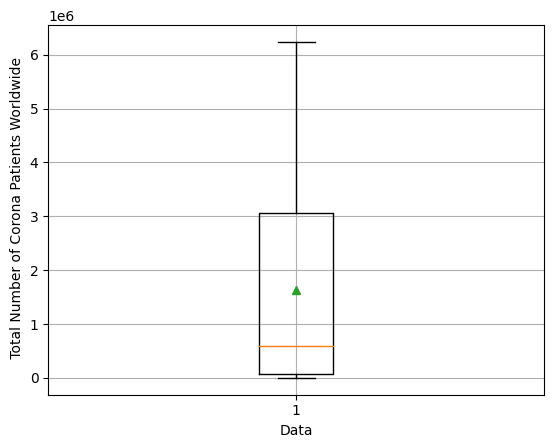

In [93]:
boxplot(D2,showmeans=True);
xlabel('Data')
ylabel(' Total Number of Corona Patients Worldwide')
grid()

Sampling Distribution:

In [94]:
def S_2(N,M):
    global M2,St2,Mean2,Sd2
    Mean2=[]
    Sd2=[]
    for x in range(M):
        S=[]
        for i in range(N):
            m=random.randint(131)
            S.append(D2[m])
        Mean2.append(mean(S))
        Sd2.append(std(S,ddof=1))
    M2= mean(Mean2)
    St2=std(Sd2,ddof=1)
    return Mean2,Sd2


In [95]:
def S2(N,M):
    hist(S_2(N,M)[0],bins=50,density=True,color='red');
    x=linspace(0,6000000)
    plot(x, norm.pdf(x, loc=M2, scale=St2),'g--', label='Normal Distribution')
    plot(x, t.pdf(x,N-1,loc=M2, scale=St2),'.-.', label='T- Distribution')
    legend(loc='best')
    xlabel('Total Number of Corona Patients Worldwide')
    ylabel('Density')

Text(0.5, 1.0, 'N=40')

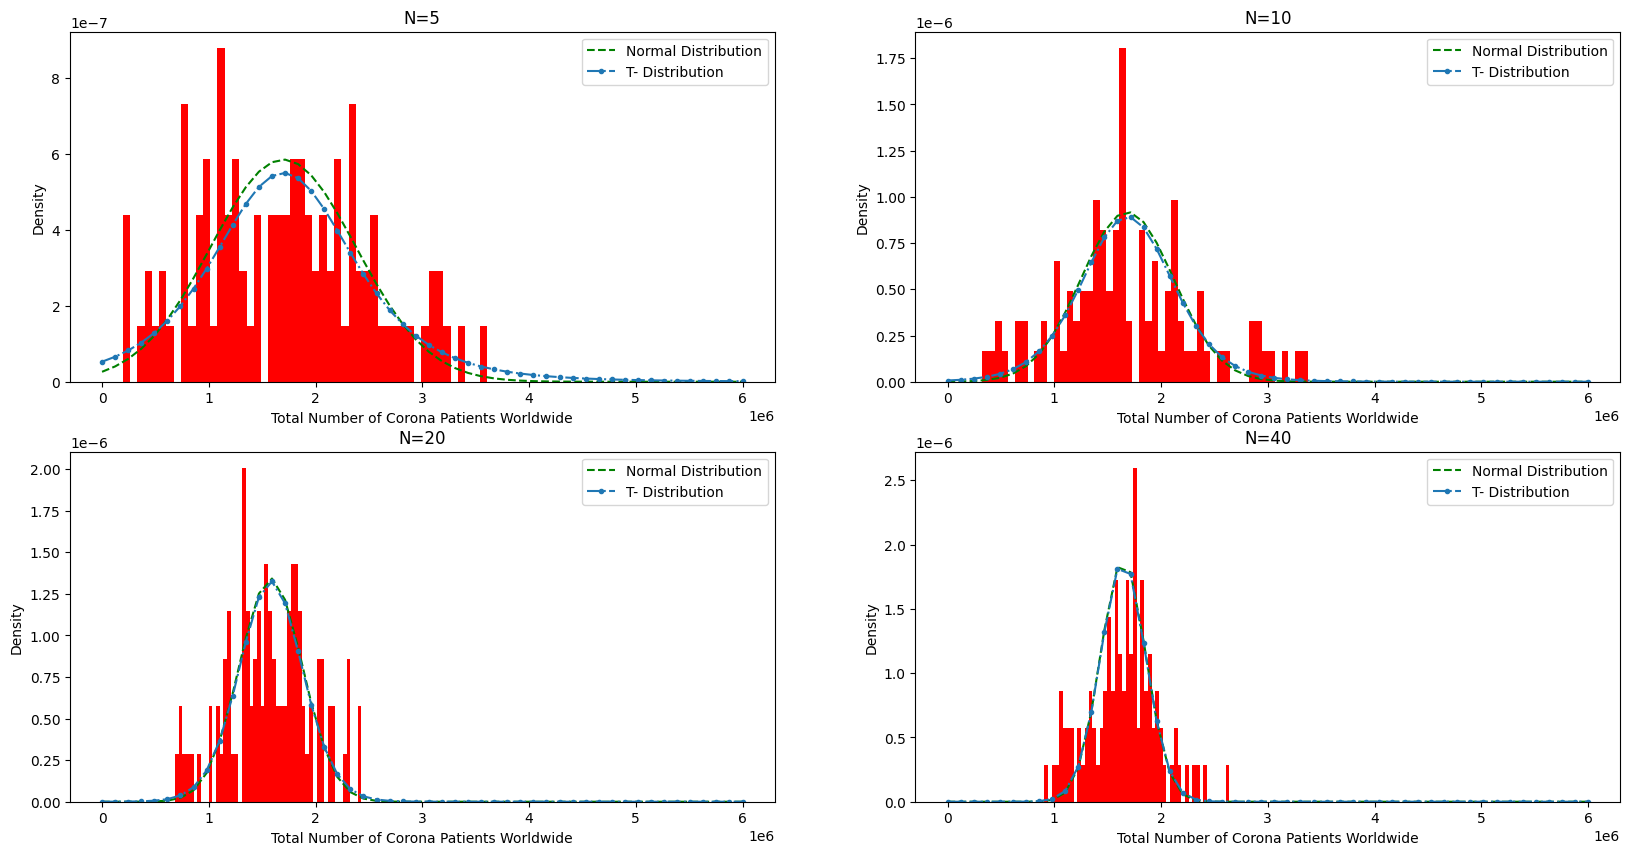

In [96]:
figure(figsize=(20,10))

subplot(2,2,1)
S2(5,100)
title('N=5')

subplot(2,2,2)
title('N=10')
S2(10,100)

subplot(2,2,3)
S2(20,100)
title('N=20')

subplot(2,2,4)
S2(40,100)
title('N=40')


interactive(children=(IntSlider(value=252, description='N', max=500, min=5), IntSlider(value=550, description=…

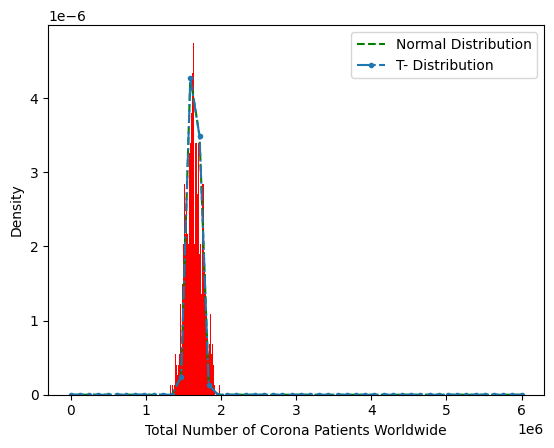

In [97]:
interact(S2,N=(5,500),M=(100,1000));

Confidence Intervals

In [98]:
def ConfInt2(percent,N):
    alpha2 = 1.0 - percent
    ppf2 = 1.0 - (0.5*alpha2)
    c2= (t.ppf(ppf2, N-1))*(St2/(sqrt(N)))
    print("{}% confidence interval of the mean ( T- distribution): {:.4f} +- {:.8f}".format(percent*100, M2, c2))

In [99]:
def Conf_Int2(percent,N):
    alpha2 = 1.0 - percent
    ppf2 = 1.0 - (0.5*alpha2)
    c2= (norm.ppf(ppf2))*(St2/(sqrt(N)))
    print("{}% confidence interval of the mean ( Normal- distribution): {:.4f} +- {:.8f}".format(percent*100, M2, c2),'\n')

In [100]:
def Conf_print2(N):
    print('N=',N)
    ConfInt2(0.8,N)
    Conf_Int2(0.8,N)

    ConfInt2(0.95,N)
    Conf_Int2(0.95,N)
    ConfInt2(0.99,N)
    Conf_Int2(0.99,N)

In [101]:
interact(Conf_print2,N=(5,100,5),M=(100,500,50));

interactive(children=(IntSlider(value=50, description='N', min=5, step=5), Output()), _dom_classes=('widget-in…

For a fixed N, the confidence interval with a lower percentage is located inside the one with a higher percentage. As N increases, the width of the confidence interval of the t- distribution decreases.
Also, for a large N, the confidence intervals of t- distribution and normal- distribution get closer.

In [102]:
def diff2(percent,H):
    alpha2 = 1.0 - percent
    ppf2 = 1.0 - (0.5*alpha2)
    cn2= (norm.ppf(ppf2))*(St2/(sqrt(H)))
    ct2= (t.ppf(ppf2, H-1))*(St2/(sqrt(H)))
    k=ct2 - cn2
    return k

In [103]:
def decrease_interval_diff2(percent):
    x=[5,10,20,30,40]
    K= [diff2(percent,5),diff2(percent,10),diff2(percent,20),diff2(percent,30),diff2(percent,40)]
    plot(x,K,'go')
    xlabel('Sample Size')
    ylabel('Difference in Confidence Interval')

interactive(children=(FloatSlider(value=0.89, description='percent', max=0.99, min=0.8, step=0.01), Output()),…

<function __main__.decrease_interval_diff2(percent)>

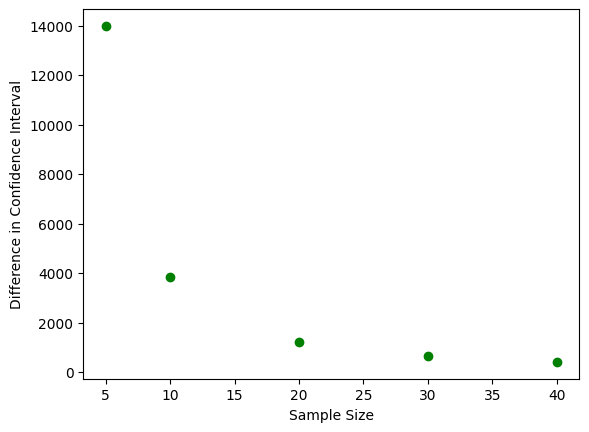

In [104]:
interact(decrease_interval_diff2,percent=(0.80,0.99,0.01))

CONFIDENCE INTERVAL AND BOXPLOT:

In [105]:
# All the confidence intervals lie in the interquantile region of the boxplot.

Experimentally Determining whether Confidence Interval Is Correct:

In [106]:
def confinter_2(N,percent,M):
    d2t,d2n =0,0
    alpha2 = 1.0 - percent
    ppf2 = 1.0 - (0.5*alpha2)
    for e in range(M):
        k=random.randint(len(Sd2))
        ki2= Mean2[k]
        kj2= Sd2[k]
        c2t= (t.ppf(ppf2, N-1))*(kj2/(sqrt(N)))
        c2n= (norm.ppf(ppf2))*(kj2/(sqrt(N)))
        if (ki2 - c2t) <= U_D2 <= (ki2 + c2t):
                d2t += 1
        if ki2 - c2n <= U_D2 <= ki2 + c2n:
                d2n += 1
    d2t /=M
    d2n /=M
    print("Fraction of experiments where true mean lies in confidence interval (t-distribution)={}".format(d2t))
    print("Fraction of experiments where true mean lies in confidence interval (normal distribution)={}".format(d2n))

In [107]:
interact(confinter_2, N=(5,40,5),percent=(0.8,0.99,0.01), M=(100,500,50));

interactive(children=(IntSlider(value=20, description='N', max=40, min=5, step=5), FloatSlider(value=0.89, des…

The t-distribution is more accurate for calculating the confidence interval as compared to the normal distribution.

# D3

Data Set D3

In [108]:
D3 = np.array([ 0.9363,  0.99  ,  0.8998,  0.87  ,  0.7408,  0.74  ,  0.6679,
        0.65  ,  0.624 ,  0.63  ,  0.5788,  0.6   ,  0.7014,  0.71  ,
        0.6367,  0.64  ,  0.5419,  0.54  ,  0.61  ,  0.66  ,  0.6125,
        0.63  ,  0.6585,  0.69  ,  0.5783,  0.55  ,  0.6134,  0.62  ,
        0.6023,  0.63  ,  0.5473,  0.55  ,  0.4262,  0.42  ,  0.4438,
        0.42  ,  0.6344,  0.64  ,  0.5187,  0.48  ,  0.3228,  0.35  ,
        0.4577,  0.46  ,  0.3409,  0.32  ,  0.2853,  0.24  ,  0.2571,
        0.23  ,  0.4055,  0.43  ,  0.4328,  0.44  ,  0.297 ,  0.29  ,
        0.3757,  0.41  ,  0.3696,  0.33  ,  0.2296,  0.19  ,  0.1342,
        0.12  ,  0.149 ,  0.15  ,  0.3411,  0.3   ,  0.1815,  0.13  ,
        0.2999,  0.33  ,  0.2637,  0.27  ,  0.2273,  0.17  ,  0.1123,
        0.07  ,  0.1978,  0.18  , -0.0792, -0.11  ,  0.0034, -0.02  ,
       -0.0719, -0.07  ,  0.1641,  0.15  ,  0.0264,  0.01  , -0.0783,
       -0.09  ,  0.0372,  0.02  ,  0.0929,  0.07  , -0.0296, -0.07  ,
       -0.0131, -0.02  , -0.0227, -0.05  , -0.078 , -0.1   , -0.1495,
       -0.2   ,  0.1068,  0.06  ,  0.0888,  0.03  ,  0.0775,  0.05  ,
        0.0204, -0.02  ,  0.0596,  0.03  ,  0.1095,  0.07  ,  0.0488,
        0.04  , -0.199 , -0.2   , -0.1354, -0.15  , -0.1165, -0.13  ,
        0.0952,  0.08  ,  0.0248,  0.01  , -0.0132, -0.07  , -0.1616,
       -0.18  , -0.0568, -0.09  , -0.0487, -0.09  , -0.0477, -0.05  ,
       -0.004 , -0.04  ,  0.171 ,  0.12  ,  0.2928,  0.25  ,  0.157 ,
        0.13  ,  0.1538,  0.09  ,  0.196 ,  0.12  ,  0.0947,  0.08  ,
       -0.0139, -0.03  , -0.0288, -0.03  , -0.0157, -0.03  , -0.1134,
       -0.15  , -0.1392, -0.2   , -0.1015, -0.14  , -0.2439, -0.29  ,
       -0.1168, -0.17  , -0.0686, -0.09  , -0.1003, -0.15  , -0.2985,
       -0.36  , -0.1774, -0.21  , -0.1546, -0.21  , -0.0667, -0.1   ,
       -0.1481, -0.21  , -0.2486, -0.28  , -0.2156, -0.24  , -0.2304,
       -0.28  , -0.1485, -0.21  , -0.2105, -0.27  , -0.2055, -0.22  ,
       -0.2084, -0.26  , -0.3146, -0.4   , -0.293 , -0.34  , -0.0693,
       -0.11  , -0.1395, -0.16  , -0.3162, -0.34  , -0.3288, -0.35  ,
       -0.4332, -0.44  , -0.3789, -0.42  , -0.4261, -0.47  , -0.4396,
       -0.43  , -0.3706, -0.4   , -0.2174, -0.23  , -0.2931, -0.28  ,
       -0.4194, -0.44  , -0.3369, -0.35  , -0.2463, -0.27  , -0.1417,
       -0.15  , -0.0679, -0.09  , -0.1173, -0.16  , -0.2546, -0.28  ,
       -0.1224, -0.11  , -0.0974, -0.15  , -0.229 , -0.21  , -0.2808,
       -0.31  , -0.3212, -0.3   , -0.3062, -0.27  , -0.2532, -0.24  ,
       -0.322 , -0.37  , -0.0982, -0.12  , -0.1471, -0.2   , -0.2489,
       -0.33  , -0.2003, -0.31  , -0.2125, -0.32  , -0.2009, -0.28  ,
       -0.1424, -0.21  , -0.0648, -0.1   , -0.0628, -0.12  , -0.1148,
       -0.2   ])

In [109]:
D3 = D3+14.3
#for i in range(137):
#    ele= file[i].split(',')
#    D3.append(float(ele[2]) + 14.3)

In [110]:
len(D3)

274

True Mean

In [111]:
U_D3=mean(D3)
print('True Mean = ',U_D3)

True Mean =  14.33658795620438


Standard Deviation

In [112]:
S_D3=std(D3,ddof=1)
print('True Standard Deviation = ',S_D3)

True Standard Deviation =  0.32006870193285025


Boxplot

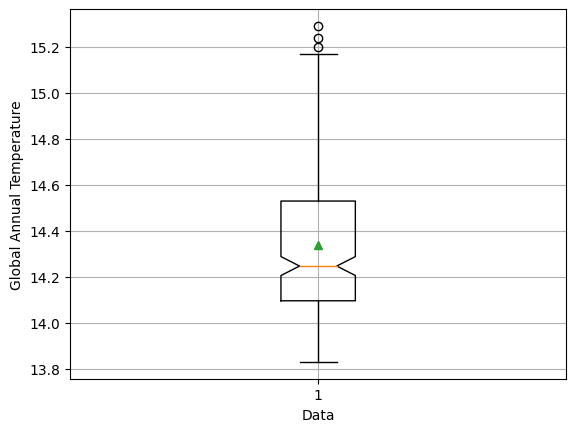

In [113]:
boxplot(D3,showmeans=True,notch=True);
xlabel('Data')
ylabel('Global Annual Temperature')
grid()

Sampling Distribution:

In [114]:

def S_3(H,M):
    global Mean3, Sd3,M3,St3
    Mean3=[]
    Sd3=[]
    for x in range(M):
        S=[]
        for i in range(H):
            m=randint(137)
            S.append(D3[m])
        Mean3.append(mean(S))
        Sd3.append(std(S,ddof=1))
    M3=mean(Mean3)
    St3=std(Sd3,ddof=1)
    return Mean3, Sd3


In [115]:
def S3(H,M):
    xlim(13,15)
    hist(S_3(H,M)[0],bins=50,density=True,color='red');
    xlabel('Global Annual Temperature')
    ylabel('Density')

Text(0.5, 1.0, 'N=40')

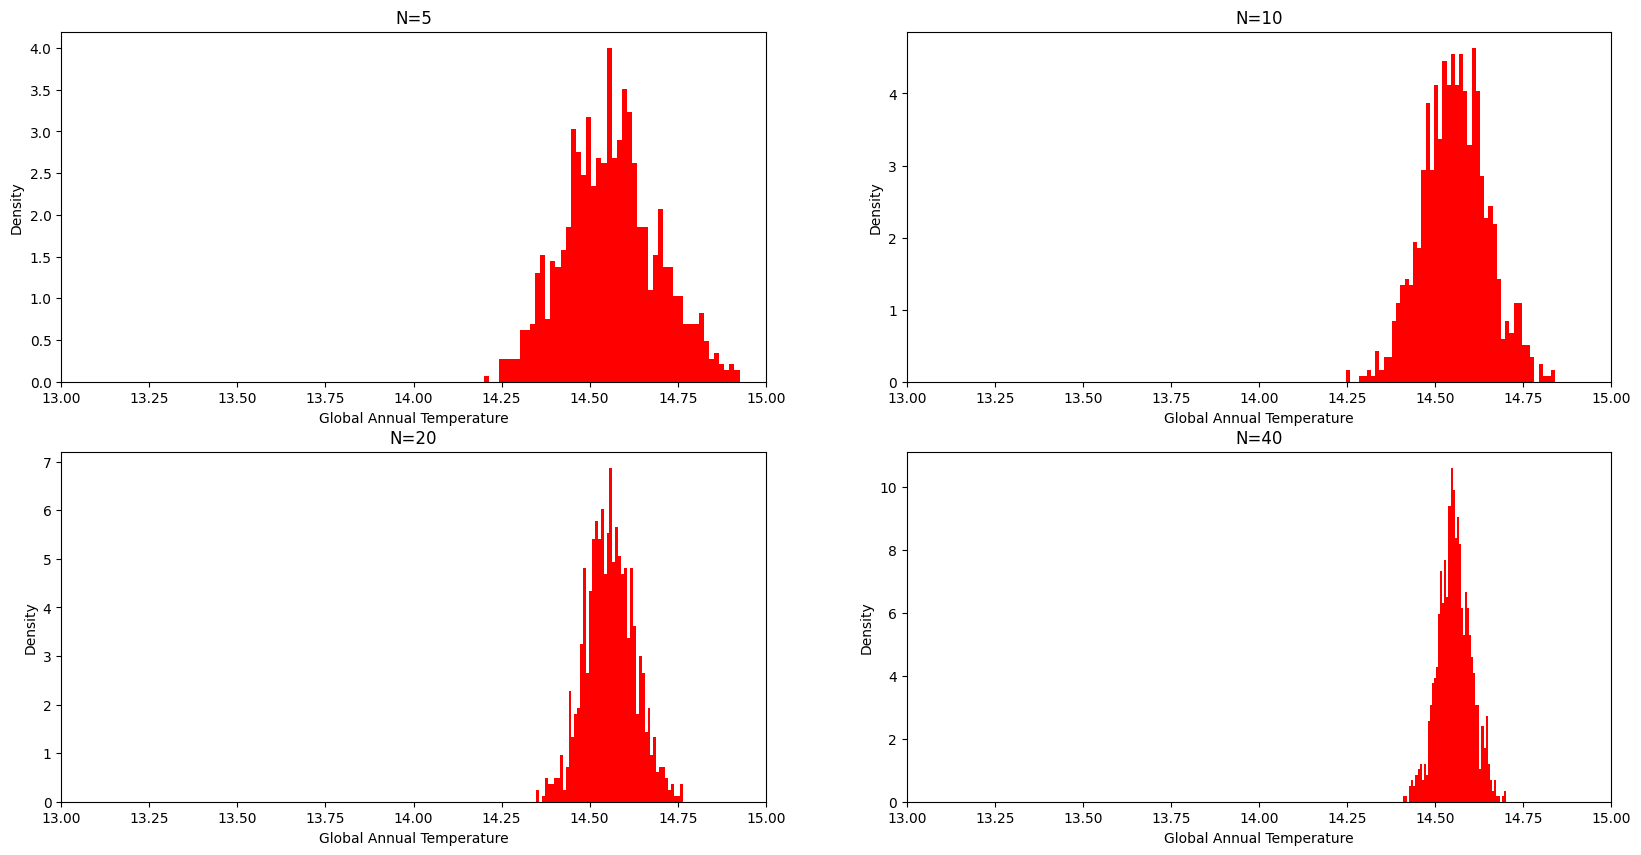

In [116]:
figure(figsize=(20,10))

subplot(2,2,1)
S3(5,1000)
title('N=5')

subplot(2,2,2)
title('N=10')
S3(10,1000)

subplot(2,2,3)
S3(20,1000)
title('N=20')

subplot(2,2,4)
S3(40,1000)
title('N=40')


In [117]:
def comp_t_norm(H,M):
    x=linspace(-5,5)
    hist((H**0.5)*((S_3(H,M)[0])-U_D3)/S_D3,bins=50,density=True,color='red');
    plot(x, norm.pdf(x, loc=0, scale=1),'y--',label='Normal Distribution')
    plot(x, t.pdf(x,H-1),'.',label='t-distribution')
    legend(loc='best')
    xlabel('x')
    ylabel('Density')

interactive(children=(IntSlider(value=252, description='H', max=500, min=5), IntSlider(value=550, description=…

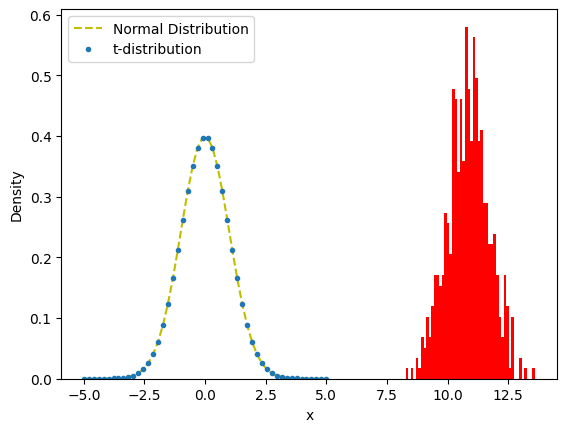

In [118]:
interact(comp_t_norm,H=(5,500),M=(100,1000));

CONFIDENCE INTERVALS

In [119]:
def ConfInt3(percent,H):
    alpha3 = 1.0 - percent
    ppf3 = 1.0 - (0.5*alpha3)
    ct3= (t.ppf(ppf3, H-1))*(St3/(sqrt(H)))
    print("{}% confidence interval of the mean ( T- distribution): {:.4f} +- {:.8f}".format(percent*100, M3, ct3))

def Conf_Int3(percent,H):
    alpha3 = 1.0 - percent
    ppf3 = 1.0 - (0.5*alpha3)
    cn3= (norm.ppf(ppf3))*(St3/(sqrt(H)))
    print("{}% confidence interval of the mean ( Normal- distribution): {:.4f} +- {:.8f}".format(percent*100, M3, cn3),'\n')

In [120]:
def Conf_print3(H):
    print('N=',H)
    ConfInt3(0.8,H)
    Conf_Int3(0.8,H)
    ConfInt3(0.95,H)
    Conf_Int3(0.95,H)
    ConfInt3(0.99,H)
    Conf_Int3(0.99,H)

In [121]:
interact(Conf_print3,H=(5,100,5));

interactive(children=(IntSlider(value=50, description='H', min=5, step=5), Output()), _dom_classes=('widget-in…

For a fixed N, the confidence interval with a lower percentage is located inside the one with a higher percentage.
As N increases, the width of the confidence interval of the t- distribution decreases. Also, for a large N, the confidence intervals of t- distribution and normal- distribution get closer.

Confidence Interval and Boxplot-

In [122]:
#All the confidence intervals lie in the interquantile region of the boxplot.

Experimentally Determining whether Confidence Interval Is Correct:

In [123]:
def confinter3(H,percent,M):
    d3t,d3n = 0,0
    alpha3 = 1.0 - percent
    ppf3 = 1.0 - (0.5*alpha3)
    for m in range(M):
        k=random.randint(len(Mean3))
        kj= Sd3[k]
        ki= Mean3[k]
        c3t= (t.ppf(ppf3, H-1))*(kj/(sqrt(H)))
        c3n= (norm.ppf(ppf3))*(kj/(sqrt(H)))
        if ki-c3t <= U_D3 <= ki + c3t:
                d3t += 1
        if ki-c3n <= U_D3 <= ki + c3n:
                d3n += 1
    d3t /= M
    d3n /= M
    print("Fraction of experiments where true mean lies in confidence interval (t-distribution) = {}".format(d3t))
    print("Fraction of experiments where true mean lies in confidence interval (normal distribution)= {}".format(d3n))

In [124]:
interact(confinter3,H=(5,40,5),percent=(0.8,0.99,0.01), M=(50,500,50));


interactive(children=(IntSlider(value=20, description='H', max=40, min=5, step=5), FloatSlider(value=0.89, des…

The t-distribution is more accurate for calculating the confidence interval as compared to the normal distribution.